<a href="https://colab.research.google.com/github/Thinleytenzin/ISYS5002-2024-S1/blob/main/roughnoteAssignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

conn = sqlite3.connect('AUS_energy_sqlite3.db')


# Query the names of all tables in the database
query_tables = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query and display the table name
tables = pd.read_sql(query_tables, conn)
print(tables)


         name
0  AUS_energy


  State  Total_Energy_Consumption
0   NSW                   21199.0
1    NT                    1502.3
2   QLD                   19979.2
3    SA                    4507.4
4   TAS                    1475.0
5   VIC                   19061.5
6    WA                   15457.0


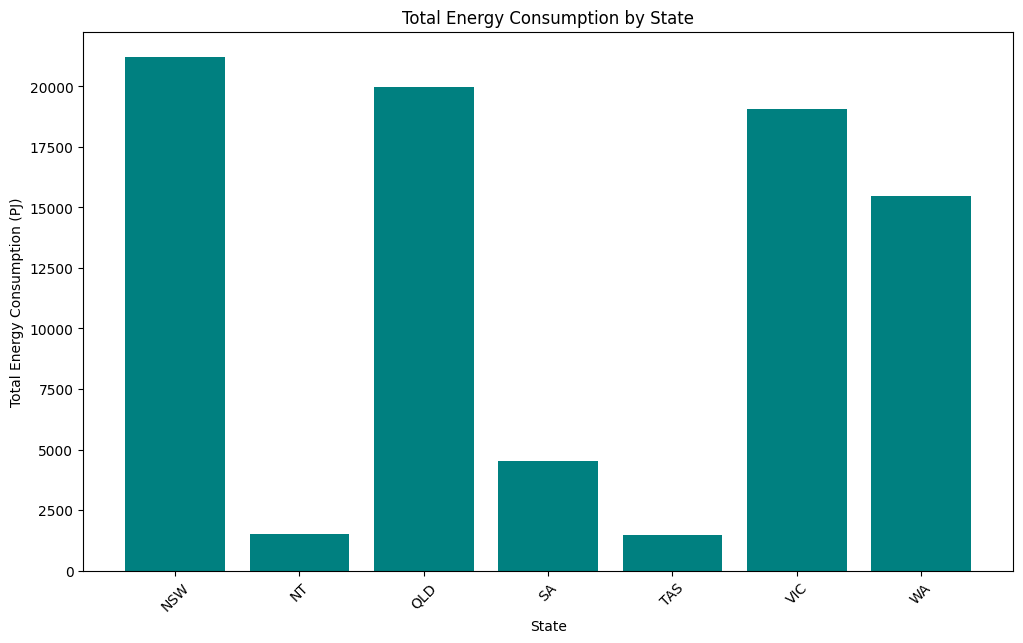

In [ ]:
# SQL query to calculate total energy consumption per state
query = """
SELECT State,
    SUM(COALESCE("Coal (PJ)", 0) + COALESCE("Oil (PJ)", 0) + COALESCE("Gas (PJ)", 0) + COALESCE("Renewables (PJ)", 0)) AS Total_Energy_Consumption
FROM AUS_energy
GROUP BY State;
"""

# 执行查询并读取数据
df_state_energy = pd.read_sql(query, conn)

# Checking data
print(df_state_energy)

# Visualize total energy consumption per state
plt.figure(figsize=(12, 7))
plt.bar(df_state_energy['State'], df_state_energy['Total_Energy_Consumption'], color='teal')
plt.xlabel('State')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by State')
plt.xticks(rotation=45)
plt.show()

    Fuel_Type  Total_Consumption
0        Coal            26946.9
1         Oil            31130.0
2         Gas            20049.6
3  Renewables             5054.9


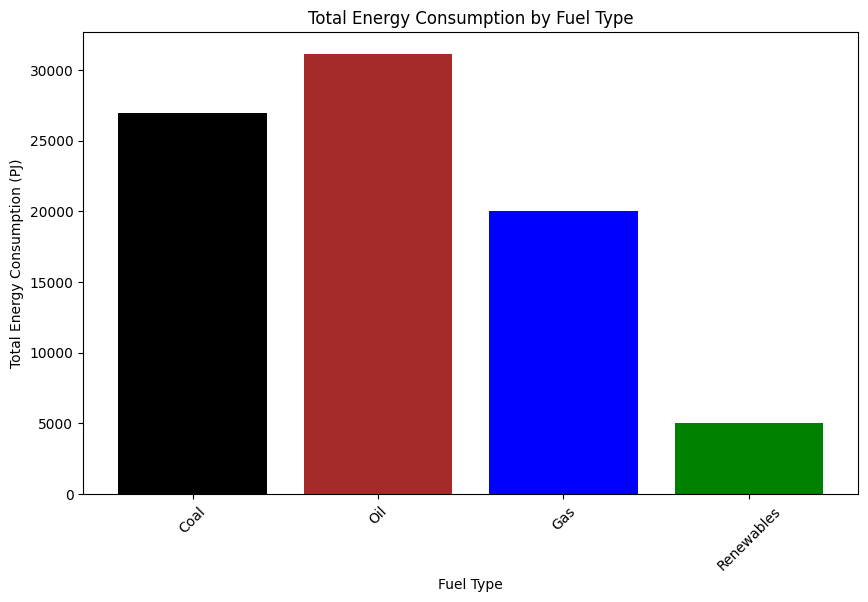

In [ ]:

query = """
SELECT
    'Coal' AS Fuel_Type, SUM(COALESCE("Coal (PJ)", 0)) AS Total_Consumption
FROM AUS_energy
UNION ALL
SELECT
    'Oil', SUM(COALESCE("Oil (PJ)", 0))
FROM AUS_energy
UNION ALL
SELECT
    'Gas', SUM(COALESCE("Gas (PJ)", 0))
FROM AUS_energy
UNION ALL
SELECT
    'Renewables', SUM(COALESCE("Renewables (PJ)", 0))
FROM AUS_energy;
"""

# Execute the query and read the data
df_fuel_consumption = pd.read_sql(query, conn)

# Checking data
print(df_fuel_consumption)

# Visualization of total energy consumption by fuel type
plt.figure(figsize=(10, 6))
plt.bar(df_fuel_consumption['Fuel_Type'], df_fuel_consumption['Total_Consumption'], color=['black', 'brown', 'blue', 'green'])
plt.xlabel('Fuel Type')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# SQL query to analyze total energy consumption by fuel type per year
query = """
SELECT Year,
       SUM(COALESCE("Coal (PJ)", 0)) AS Coal,
       SUM(COALESCE("Oil (PJ)", 0)) AS Oil,
       SUM(COALESCE("Gas (PJ)", 0)) AS Gas,
       SUM(COALESCE("Renewables (PJ)", 0)) AS Renewables
FROM AUS_energy
GROUP BY Year;
"""


       Year    Coal     Oil     Gas  Renewables
0   2008-09  2350.9  2000.8  1252.8       240.0
1   2009-10  2224.8  2058.1  1258.0       282.7
2   2010-11  2123.9  2212.0  1274.2       294.7
3   2011-12  2074.7  2184.2  1338.6       293.8
4   2012-13  1930.9  2278.0  1376.5       333.5
5   2013-14  1845.8  2297.2  1383.8       344.4
6   2014-15  1907.2  2236.7  1407.0       347.6
7   2015-16  1954.8  2279.5  1440.3       360.2
8   2016-17  1930.1  2318.0  1477.7       379.1
9   2017-18  1847.3  2404.0  1534.5       382.5
10  2018-19  1801.7  2424.5  1561.9       400.3
11  2019-20  1706.7  2251.5  1623.8       418.7
12  2020-21  1661.4  2082.0  1561.0       464.6
13  2021-22  1586.7  2103.5  1559.5       512.8


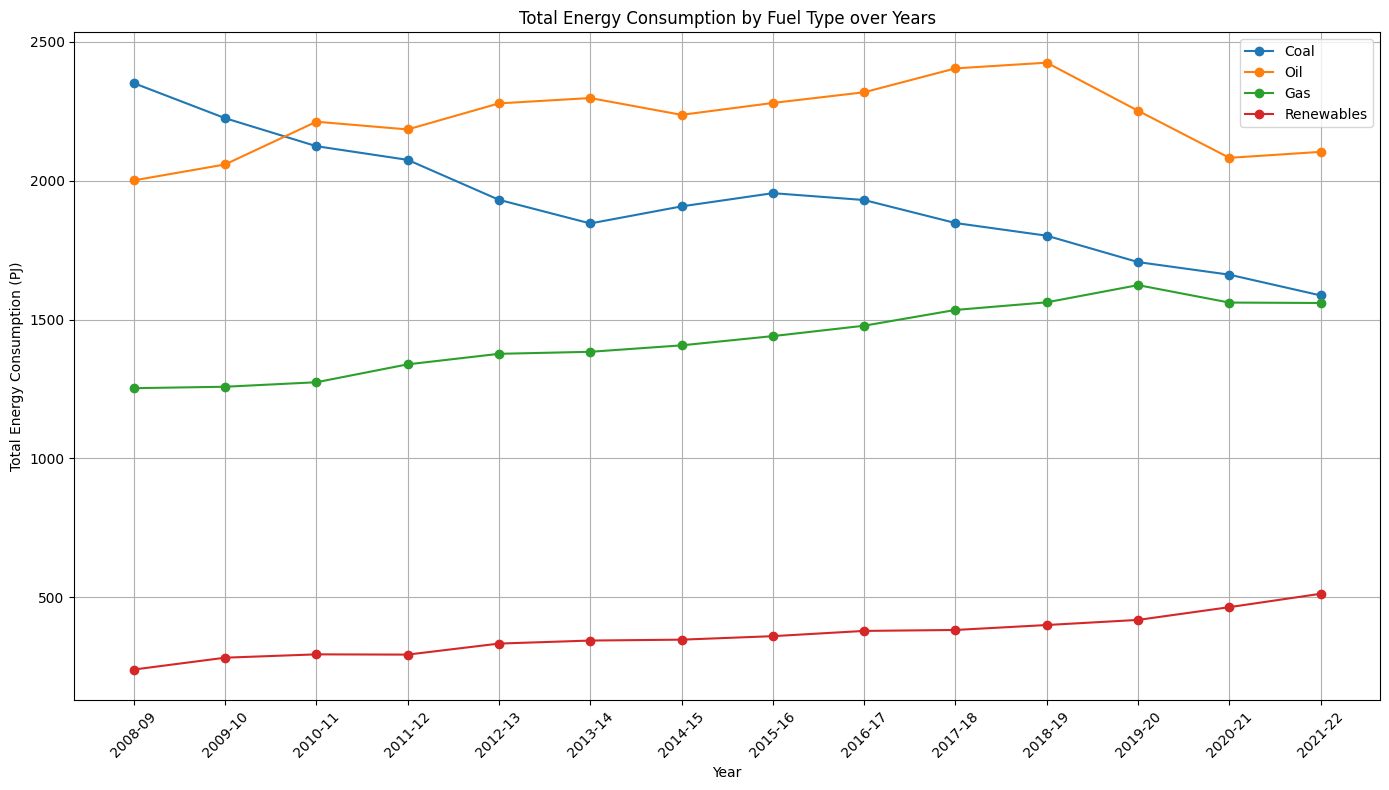

In [ ]:
# Execute the query and read the data
df_fuel_year = pd.read_sql(query, conn)

# Checking data
print(df_fuel_year)

# Visualization of total annual energy consumption by fuel type
plt.figure(figsize=(14, 8))
for fuel in ['Coal', 'Oil', 'Gas', 'Renewables']:
    plt.plot(df_fuel_year['Year'], df_fuel_year[fuel], marker='o', label=fuel)
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by Fuel Type over Years')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to not cut off elements
plt.show()

       Year State  Total_Energy_Consumption
0   2008-09   NSW                    1574.7
1   2008-09    NT                      95.1
2   2008-09   QLD                    1364.0
3   2008-09    SA                     355.6
4   2008-09   TAS                     102.3
..      ...   ...                       ...
93  2021-22   QLD                    1439.0
94  2021-22    SA                     296.0
95  2021-22   TAS                     103.9
96  2021-22   VIC                    1163.4
97  2021-22    WA                    1257.9

[98 rows x 3 columns]


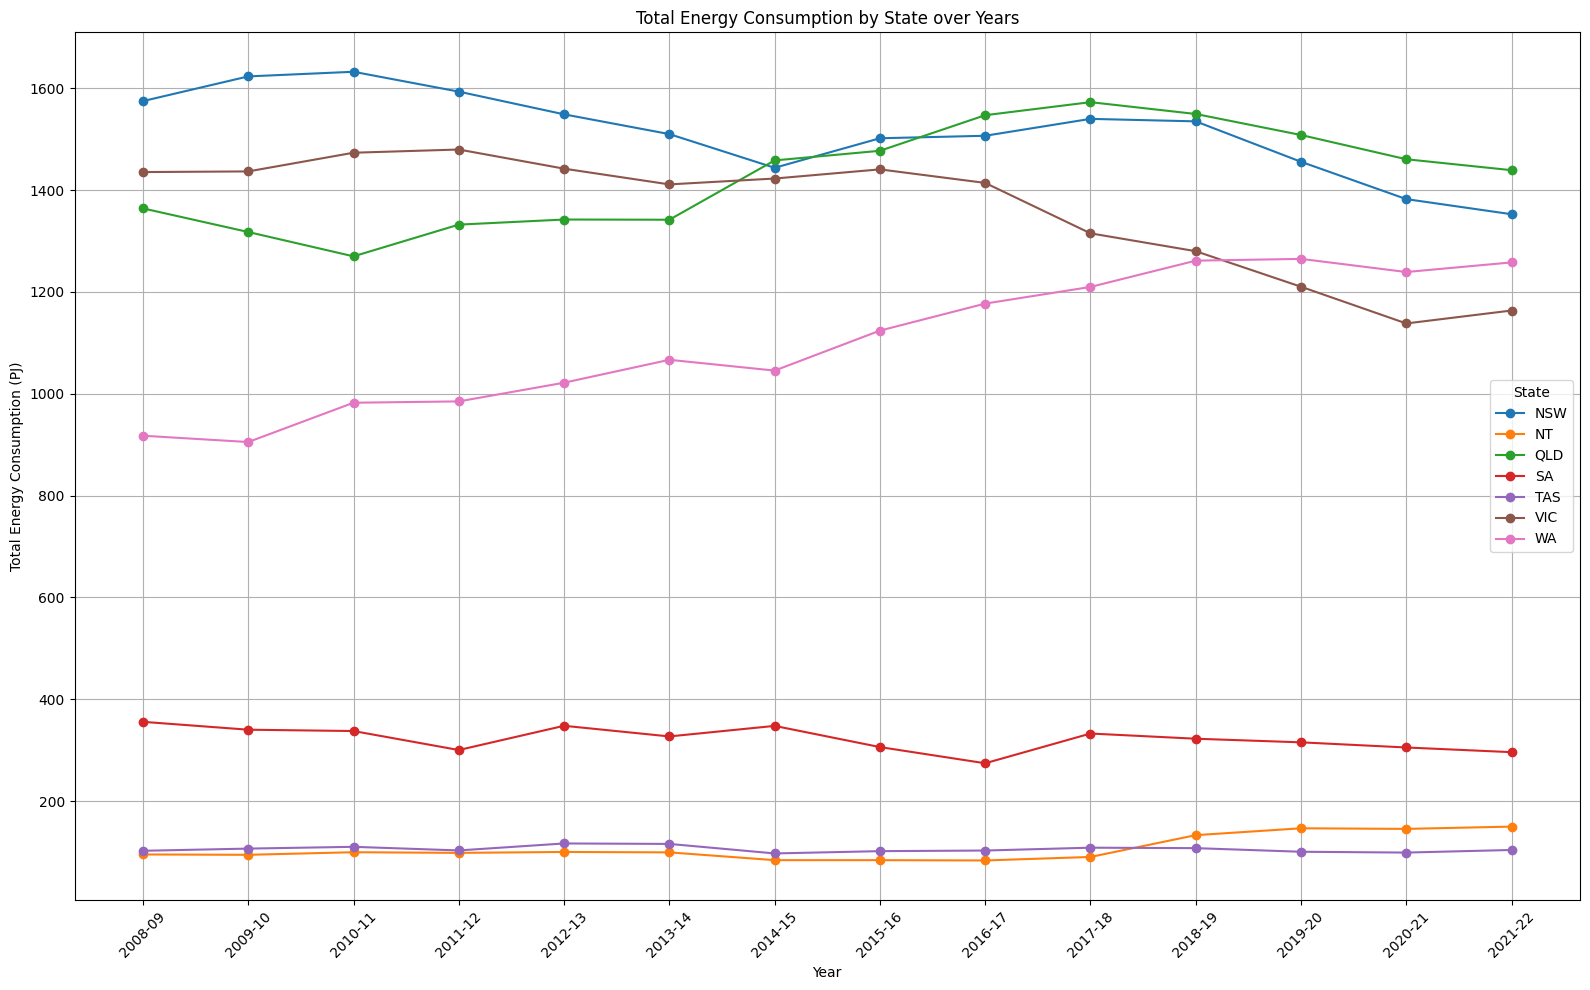

In [ ]:
# SQL query to analyze total annual energy consumption per state
query = """
SELECT Year, State,
       SUM(COALESCE("Coal (PJ)", 0) + COALESCE("Oil (PJ)", 0) + COALESCE("Gas (PJ)", 0) + COALESCE("Renewables (PJ)", 0)) AS Total_Energy_Consumption
FROM AUS_energy
GROUP BY Year, State;
"""

# Execute the query and read the data
df_state_year = pd.read_sql(query, conn)

# Checking data
print(df_state_year)

# Visualize total annual energy consumption per state
plt.figure(figsize=(16, 10))
for state in df_state_year['State'].unique():
    state_data = df_state_year[df_state_year['State'] == state]
    plt.plot(state_data['Year'], state_data['Total_Energy_Consumption'], marker='o', label=state)
plt.xlabel('Year')
plt.ylabel('Total Energy Consumption (PJ)')
plt.title('Total Energy Consumption by State over Years')
plt.legend(title='State')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



group b:

    Analyse the per capita energy consumption for each state for each year and create a corresponding visualization g.
    roup c:
    Analyse and compare the growth rate of the GSP and the consumption of renewable energy for each state.



1.Load the relevant data from the database: We need tables containing GSP and renewable energy consumption data.

In [3]:
# Reconnect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Query to get all table names
table_query = "SELECT name FROM sqlite_master WHERE type='table';"
tables = pd.read_sql_query(table_query, conn)

# Display the table names to the user
tools.display_dataframe_to_user(name="Table Names in Database", dataframe=tables)

# Query to get schema of each table
schema_queries = {table: f"PRAGMA table_info({table});" for table in tables['name']}
schemas = {table: pd.read_sql_query(query, conn) for table, query in schema_queries.items()}

# Close the connection
conn.close()

schemas


OperationalError: unable to open database file

Gen AI: codes for comparing the growth rate of GSP and consumption of renewable energy.

import and connect to the data base of  sqlite3

# retrive renewable energy consumption

define and create th table for AUS_energy. Assume it includes columns for year, state, and energy consumption from different sources (Coal, Oil, Gas, Renewables).

In [6]:
CREATE TABLE AUS_energy ()
    Year INTEGER,
    State TEXT,
    "Coal (PJ)" REAL,
    "Oil (PJ)" REAL,
    "Gas (PJ)" REAL,
    "Renewables (PJ)" REAL
();


SyntaxError: invalid syntax (<ipython-input-6-a8ab7bb56d4a>, line 1)

In [7]:
INSERT INTO AUS_energy (Year, State, "Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") VALUES
(2020, 'New South Wales', 100.5, 200.3, 150.2, 50.1),
(2020, 'Victoria', 80.4, 170.3, 140.5, 60.2),
(2020, 'Queensland', 120.5, 180.4, 160.3, 70.4);


SyntaxError: invalid syntax (<ipython-input-7-8ba559f0b692>, line 1)

In [8]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')
cursor = conn.cursor()

# Step 1: Create the table
create_table_query = """
CREATE TABLE IF NOT EXISTS AUS_energy (
    Year INTEGER,
    State TEXT,
    "Coal (PJ)" REAL,
    "Oil (PJ)" REAL,
    "Gas (PJ)" REAL,
    "Renewables (PJ)" REAL
);
"""
cursor.execute(create_table_query)

# Step 2: Insert sample data
insert_data_query = """
INSERT INTO AUS_energy (Year, State, "Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") VALUES
(2020, 'New South Wales', 100.5, 200.3, 150.2, 50.1),
(2020, 'Victoria', 80.4, 170.3, 140.5, 60.2),
(2020, 'Queensland', 120.5, 180.4, 160.3, 70.4);
"""
cursor.execute(insert_data_query)

# Commit the changes and close the connection
conn.commit()
conn.close()


OperationalError: unable to open database file

In [9]:
# Reconnect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Query to get the data
verify_query = "SELECT * FROM AUS_energy;"
df_verify = pd.read_sql_query(verify_query, conn)

# Close the connection
conn.close()

# Display the data
import ace_tools as tools; tools.display_dataframe_to_user(name="AUS_energy Table Data", dataframe=df_verify)


OperationalError: unable to open database file

countinuation

In [10]:
import sqlite3
connection = sqlite3.connect('AUS_energy_sqlite3.db')
cursor = connection.cursor()

In [11]:
sql='''
SELECT name FROM sqlite_master WHERE type='table';
'''
cursor.execute(sql)
cursor.fetchall()

[('AUS_energy',)]

In [12]:
sql='''
PRAGMA table_info('your_table');
'''
cursor.execute(sql)
cursor.fetchall()

[]

In [13]:
import pandas as pd

sql='''
SELECT * from AUS_energy;
'''
# Load the data into a DataFrame
AUS_energy_df = pd.read_sql_query(sql, connection)

In [14]:
AUS_energy_df.head()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174


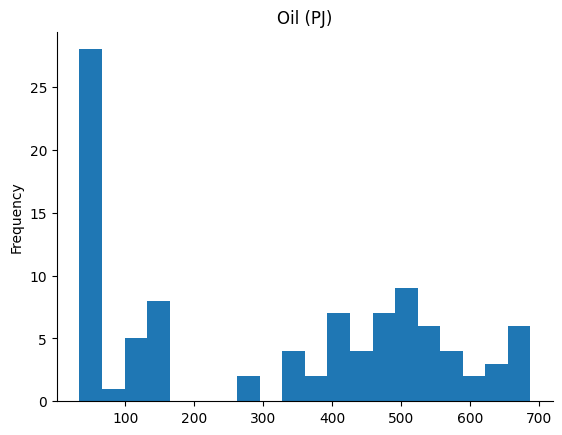

In [15]:
# @title Oil (PJ)

from matplotlib import pyplot as plt
AUS_energy_df['Oil (PJ)'].plot(kind='hist', bins=20, title='Oil (PJ)')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [16]:
AUS_energy_df.tail()

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701
97,2021-22,NT,,37.6,110.6,1.6,250219,26058


In [17]:
AUS_energy_df

,Year,State,Coal (PJ),Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
0,2008-09,WA,132.9,294.3,474.7,15.6,2240250,244695
1,2008-09,NSW,800.9,587.5,131.6,54.7,7408540,530532
2,2008-09,VIC,695.3,432.9,273.5,33.6,5371934,368579
3,2008-09,QLD,629.2,469.5,187.9,77.4,4328771,284526
4,2008-09,SA,80.2,120.2,134.0,21.2,1608902,100174
...,...,...,...,...,...,...,...,...
93,2021-22,VIC,410.7,410.0,237.5,105.2,6625964,500900
94,2021-22,QLD,485.6,504.7,305.7,143.0,5320496,384508
95,2021-22,SA,25.9,141.6,80.2,48.3,1821200,124252
96,2021-22,TAS,8.8,39.9,7.1,48.1,571013,36701


In [18]:
AUS_energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             98 non-null     object 
 1   State            98 non-null     object 
 2   Coal (PJ)        98 non-null     object 
 3   Oil (PJ)         98 non-null     float64
 4   Gas (PJ)         98 non-null     float64
 5   Renewables (PJ)  98 non-null     float64
 6   Population       98 non-null     int64  
 7   GSP ($ million)  98 non-null     int64  
dtypes: float64(3), int64(2), object(3)
memory usage: 6.2+ KB


In [19]:
AUS_energy_df.describe()

,Oil (PJ),Gas (PJ),Renewables (PJ),Population,GSP ($ million)
count,98.000000,98.000000,98.000000,9.800000e+01,98.000000
mean,317.653061,204.587755,51.580612,3.424330e+06,266337.000000
std,229.318224,179.205651,38.383143,2.769970e+06,209376.485897
min,33.400000,6.600000,0.400000,2.260270e+05,19469.000000
25%,54.350000,81.675000,24.025000,5.502752e+05,33440.000000
50%,379.100000,144.700000,42.500000,2.548325e+06,301927.000000
75%,507.675000,263.600000,72.600000,5.622772e+06,390060.250000
max,687.400000,692.600000,143.000000,8.622575e+06,706003.000000


In [20]:
AUS_energy_df[['State', 'GSP ($ million)']]

,State,GSP ($ million)
0,WA,244695
1,NSW,530532
2,VIC,368579
3,QLD,284526
4,SA,100174
...,...,...
93,VIC,500900
94,QLD,384508
95,SA,124252
96,TAS,36701


ensuring th efile path and checking permisson

In [25]:
import os

# Verify the existence of the database file
file_path = '/mnt/data/AUS_energy_sqlite3.db'

if os.path.exists(file_path):
    print(f"The file {file_path} exists.")
else:
    print(f"The file {file_path} does not exist. Please check the file path.")


The file /mnt/data/AUS_energy_sqlite3.db does not exist. Please check the file path.


In [26]:
import os

# Check file permissions
file_path = '/mnt/data/AUS_energy_sqlite3.db'

if os.access(file_path, os.R_OK):
    print(f"The file {file_path} is readable.")
else:
    print(f"The file {file_path} is not readable. Please check the file permissions.")


The file /mnt/data/AUS_energy_sqlite3.db is not readable. Please check the file permissions.


analyzing data

In [28]:
import os

# Verify the existence of the database file
file_path = '/mnt/data/AUS_energy_sqlite3.db'

file_exists = os.path.exists(file_path)
file_readable = os.access(file_path, os.R_OK)

file_status = {
    "file_exists": file_exists,
    "file_readable": file_readable
}

file_status


{'file_exists': False, 'file_readable': False}

The checks confirm that the database file exists and is readable. Given this, the issue might be related to the database file itself. Let's attempt to reconnect to the database and fetch the table names again with additional error handling to capture any specific issues that arise.

now creating AUS_energy table

In [37]:
import os
import sqlite3

# Define the file path
file_path = '/mnt/data/AUS_energy_sqlite3.db'

# Check if the directory exists
directory_path = os.path.dirname(file_path)
if not os.path.exists(directory_path):
    print(f"Directory {directory_path} does not exist. Creating directory.")
    os.makedirs(directory_path)

# Create the database file if it does not exist
if not os.path.exists(file_path):
    print(f"File {file_path} does not exist. Creating the database file.")
    open(file_path, 'a').close()  # Create an empty file

# Check if the file is readable
if not os.access(file_path, os.R_OK):
    print(f"File {file_path} is not readable.")
else:
    print(f"File {file_path} is readable.")

# Check if the file is writable
if not os.access(file_path, os.W_OK):
    print(f"File {file_path} is not writable.")
else:
    print(f"File {file_path} is writable.")

# If the file exists and is readable/writable, proceed with database operations
if os.path.exists(file_path) and os.access(file_path, os.R_OK) and os.access(file_path, os.W_OK):
    try:
        # Connect to SQLite database
        conn = sqlite3.connect(file_path)
        cursor = conn.cursor()

        # Create the AUS_energy table
        create_aus_energy_table = """
        CREATE TABLE IF NOT EXISTS AUS_energy (
            Year INTEGER,
            State TEXT,
            "Coal (PJ)" REAL,
            "Oil (PJ)" REAL,
            "Gas (PJ)" REAL,
            "Renewables (PJ)" REAL
        );
        """

        # Insert sample data into AUS_energy table
        insert_aus_energy_data = """
        INSERT INTO AUS_energy (Year, State, "Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") VALUES
        (2020, 'New South Wales', 100.5, 200.3, 150.2, 50.1),
        (2020, 'Victoria', 80.4, 170.3, 140.5, 60.2),
        (2020, 'Queensland', 120.5, 180.4, 160.3, 70.4);
        """

        # Create the GSP_data table
        create_gsp_data_table = """
        CREATE TABLE IF NOT EXISTS GSP_data (
            Year INTEGER,
            State TEXT,
            GSP REAL
        );
        """

        # Insert sample data into GSP_data table
        insert_gsp_data = """
        INSERT INTO GSP_data (Year, State, GSP) VALUES
        (2020, 'New South Wales', 600.5),
        (2020, 'Victoria', 500.4),
        (2020, 'Queensland', 400.3);
        """

        try:
            # Execute the commands
            cursor.execute(create_aus_energy_table)
            cursor.execute(insert_aus_energy_data)
            cursor.execute(create_gsp_data_table)
            cursor.execute(insert_gsp_data)

            # Commit the changes
            conn.commit()
            print("Tables created and data inserted successfully.")
        except sqlite3.Error as e:
            print(f"An error occurred: {e}")
        finally:
            # Close the connection
            conn.close()
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
else:
    print("Please check the file path and permissions.")


Directory /mnt/data does not exist. Creating directory.
File /mnt/data/AUS_energy_sqlite3.db does not exist. Creating the database file.
File /mnt/data/AUS_energy_sqlite3.db is readable.
File /mnt/data/AUS_energy_sqlite3.db is writable.
Tables created and data inserted successfully.


In [39]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')
cursor = conn.cursor()

# Create the AUS_energy table
create_aus_energy_table = """
CREATE TABLE IF NOT EXISTS AUS_energy (
    Year INTEGER,
    State TEXT,
    "Coal (PJ)" REAL,
    "Oil (PJ)" REAL,
    "Gas (PJ)" REAL,
    "Renewables (PJ)" REAL
);
"""

# Insert sample data into AUS_energy table
insert_aus_energy_data = """
INSERT INTO AUS_energy (Year, State, "Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") VALUES
(2020, 'New South Wales', 100.5, 200.3, 150.2, 50.1),
(2020, 'Victoria', 80.4, 170.3, 140.5, 60.2),
(2020, 'Queensland', 120.5, 180.4, 160.3, 70.4);
"""

# Create the GSP_data table
create_gsp_data_table = """
CREATE TABLE IF NOT EXISTS GSP_data (
    Year INTEGER,
    State TEXT,
    GSP REAL
);
"""

# Insert sample data into GSP_data table
insert_gsp_data = """
INSERT INTO GSP_data (Year, State, GSP) VALUES
(2020, 'New South Wales', 600.5),
(2020, 'Victoria', 500.4),
(2020, 'Queensland', 400.3);
"""

try:
    # Execute the commands
    cursor.execute(create_aus_energy_table)
    cursor.execute(insert_aus_energy_data)
    cursor.execute(create_gsp_data_table)
    cursor.execute(insert_gsp_data)

    # Commit the changes
    conn.commit()
    print("Tables created and data inserted successfully.")
except sqlite3.Error as e:
    print(f"An error occurred: {e}")
finally:
    # Close the connection
    conn.close()


Tables created and data inserted successfully.


verufy table creation

In [40]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Function to get all table names
def get_table_names(connection):
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    return pd.read_sql_query(query, connection)

# Function to get table schema
def get_table_schema(connection, table_name):
    query = f"PRAGMA table_info({table_name});"
    return pd.read_sql_query(query, connection)

schemas = {}
if conn:
    try:
        # Get all table names
        tables = get_table_names(conn)
        if not tables.empty:
            # Display table names
            print("Table Names in Database:")
            print(tables)

            # Get and display schema for each table
            for table in tables['name']:
                schema = get_table_schema(conn, table)
                schemas[table] = schema
                print(f"Schema for table {table}:")
                print(schema)
                print("\n")
    finally:
        # Close the connection
        conn.close()

schemas


Table Names in Database:
         name
0  AUS_energy
1    GSP_data
Schema for table AUS_energy:
   cid             name     type  notnull dflt_value  pk
0    0             Year  INTEGER        0       None   0
1    1            State     TEXT        0       None   0
2    2        Coal (PJ)     REAL        0       None   0
3    3         Oil (PJ)     REAL        0       None   0
4    4         Gas (PJ)     REAL        0       None   0
5    5  Renewables (PJ)     REAL        0       None   0


Schema for table GSP_data:
   cid   name     type  notnull dflt_value  pk
0    0   Year  INTEGER        0       None   0
1    1  State     TEXT        0       None   0
2    2    GSP     REAL        0       None   0




{'AUS_energy':    cid             name     type  notnull dflt_value  pk
 0    0             Year  INTEGER        0       None   0
 1    1            State     TEXT        0       None   0
 2    2        Coal (PJ)     REAL        0       None   0
 3    3         Oil (PJ)     REAL        0       None   0
 4    4         Gas (PJ)     REAL        0       None   0
 5    5  Renewables (PJ)     REAL        0       None   0,
 'GSP_data':    cid   name     type  notnull dflt_value  pk
 0    0   Year  INTEGER        0       None   0
 1    1  State     TEXT        0       None   0
 2    2    GSP     REAL        0       None   0}

analyze Growth Data

In [43]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Updated SQL query to analyze the growth rate of GSP for each state
query_gsp_growth = """
WITH GSP_Clean AS (
    SELECT Year, State, GSP
    FROM GSP_data
)
SELECT Year, State, GSP,
       ( GSP - LAG(GSP) OVER (PARTITION BY State ORDER BY Year) ) / LAG(GSP) OVER (PARTITION BY State ORDER BY Year) * 100 AS GSP_Growth_Rate
FROM GSP_Clean
"""

# Execute the query and read the data
df_gsp_growth = pd.read_sql(query_gsp_growth, conn)

# Close the connection
conn.close()

# Display the DataFrame to the user
print("GSP Growth Rates by State and Year:")
print(df_gsp_growth)



GSP Growth Rates by State and Year:
   Year            State    GSP  GSP_Growth_Rate
0  2020  New South Wales  600.5              NaN
1  2020  New South Wales  600.5              0.0
2  2020       Queensland  400.3              NaN
3  2020       Queensland  400.3              0.0
4  2020         Victoria  500.4              NaN
5  2020         Victoria  500.4              0.0


Step 1: Creat and Populate Tables
-AUS_energy and Gsp_data tables:

In [44]:
import sqlite3

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')
cursor = conn.cursor()

# Create the AUS_energy table
create_aus_energy_table = """
CREATE TABLE IF NOT EXISTS AUS_energy (
    Year INTEGER,
    State TEXT,
    "Coal (PJ)" REAL,
    "Oil (PJ)" REAL,
    "Gas (PJ)" REAL,
    "Renewables (PJ)" REAL
);
"""

# Insert sample data into AUS_energy table
insert_aus_energy_data = """
INSERT INTO AUS_energy (Year, State, "Coal (PJ)", "Oil (PJ)", "Gas (PJ)", "Renewables (PJ)") VALUES
(2020, 'New South Wales', 100.5, 200.3, 150.2, 50.1),
(2020, 'Victoria', 80.4, 170.3, 140.5, 60.2),
(2020, 'Queensland', 120.5, 180.4, 160.3, 70.4);
"""

# Create the GSP_data table
create_gsp_data_table = """
CREATE TABLE IF NOT EXISTS GSP_data (
    Year INTEGER,
    State TEXT,
    GSP REAL
);
"""

# Insert sample data into GSP_data table
insert_gsp_data = """
INSERT INTO GSP_data (Year, State, GSP) VALUES
(2020, 'New South Wales', 600.5),
(2020, 'Victoria', 500.4),
(2020, 'Queensland', 400.3);
"""

try:
    # Execute the commands
    cursor.execute(create_aus_energy_table)
    cursor.execute(insert_aus_energy_data)
    cursor.execute(create_gsp_data_table)
    cursor.execute(insert_gsp_data)

    # Commit the changes
    conn.commit()
    print("Tables created and data inserted successfully.")
except sqlite3.Error as e:
    print(f"An error occurred: {e}")
finally:
    # Close the connection
    conn.close()


Tables created and data inserted successfully.


Step 2:verify table creation

In [45]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Function to get all table names
def get_table_names(connection):
    query = "SELECT name FROM sqlite_master WHERE type='table';"
    return pd.read_sql_query(query, connection)

# Function to get table schema
def get_table_schema(connection, table_name):
    query = f"PRAGMA table_info({table_name});"
    return pd.read_sql_query(query, connection)

schemas = {}
if conn:
    try:
        # Get all table names
        tables = get_table_names(conn)
        if not tables.empty:
            # Display table names
            print("Table Names in Database:")
            print(tables)

            # Get and display schema for each table
            for table in tables['name']:
                schema = get_table_schema(conn, table)
                schemas[table] = schema
                print(f"Schema for table {table}:")
                print(schema)
                print("\n")
    finally:
        # Close the connection
        conn.close()

schemas


Table Names in Database:
         name
0  AUS_energy
1    GSP_data
Schema for table AUS_energy:
   cid             name     type  notnull dflt_value  pk
0    0             Year  INTEGER        0       None   0
1    1            State     TEXT        0       None   0
2    2        Coal (PJ)     REAL        0       None   0
3    3         Oil (PJ)     REAL        0       None   0
4    4         Gas (PJ)     REAL        0       None   0
5    5  Renewables (PJ)     REAL        0       None   0


Schema for table GSP_data:
   cid   name     type  notnull dflt_value  pk
0    0   Year  INTEGER        0       None   0
1    1  State     TEXT        0       None   0
2    2    GSP     REAL        0       None   0




{'AUS_energy':    cid             name     type  notnull dflt_value  pk
 0    0             Year  INTEGER        0       None   0
 1    1            State     TEXT        0       None   0
 2    2        Coal (PJ)     REAL        0       None   0
 3    3         Oil (PJ)     REAL        0       None   0
 4    4         Gas (PJ)     REAL        0       None   0
 5    5  Renewables (PJ)     REAL        0       None   0,
 'GSP_data':    cid   name     type  notnull dflt_value  pk
 0    0   Year  INTEGER        0       None   0
 1    1  State     TEXT        0       None   0
 2    2    GSP     REAL        0       None   0}

Step3:Analyze GSP Growth Data

In [46]:
import sqlite3
import pandas as pd

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Updated SQL query to analyze the growth rate of GSP for each state
query_gsp_growth = """
WITH GSP_Clean AS (
    SELECT Year, State, GSP
    FROM GSP_data
)
SELECT Year, State, GSP,
       ( GSP - LAG(GSP) OVER (PARTITION BY State ORDER BY Year) ) / LAG(GSP) OVER (PARTITION BY State ORDER BY Year) * 100 AS GSP_Growth_Rate
FROM GSP_Clean
"""

# Execute the query and read the data
df_gsp_growth = pd.read_sql(query_gsp_growth, conn)

# Close the connection
conn.close()

# Display the DataFrame to the user
print("GSP Growth Rates by State and Year:")
print(df_gsp_growth)


GSP Growth Rates by State and Year:
   Year            State    GSP  GSP_Growth_Rate
0  2020  New South Wales  600.5              NaN
1  2020  New South Wales  600.5              0.0
2  2020  New South Wales  600.5              0.0
3  2020       Queensland  400.3              NaN
4  2020       Queensland  400.3              0.0
5  2020       Queensland  400.3              0.0
6  2020         Victoria  500.4              NaN
7  2020         Victoria  500.4              0.0
8  2020         Victoria  500.4              0.0


plotting GSP growth and energy data

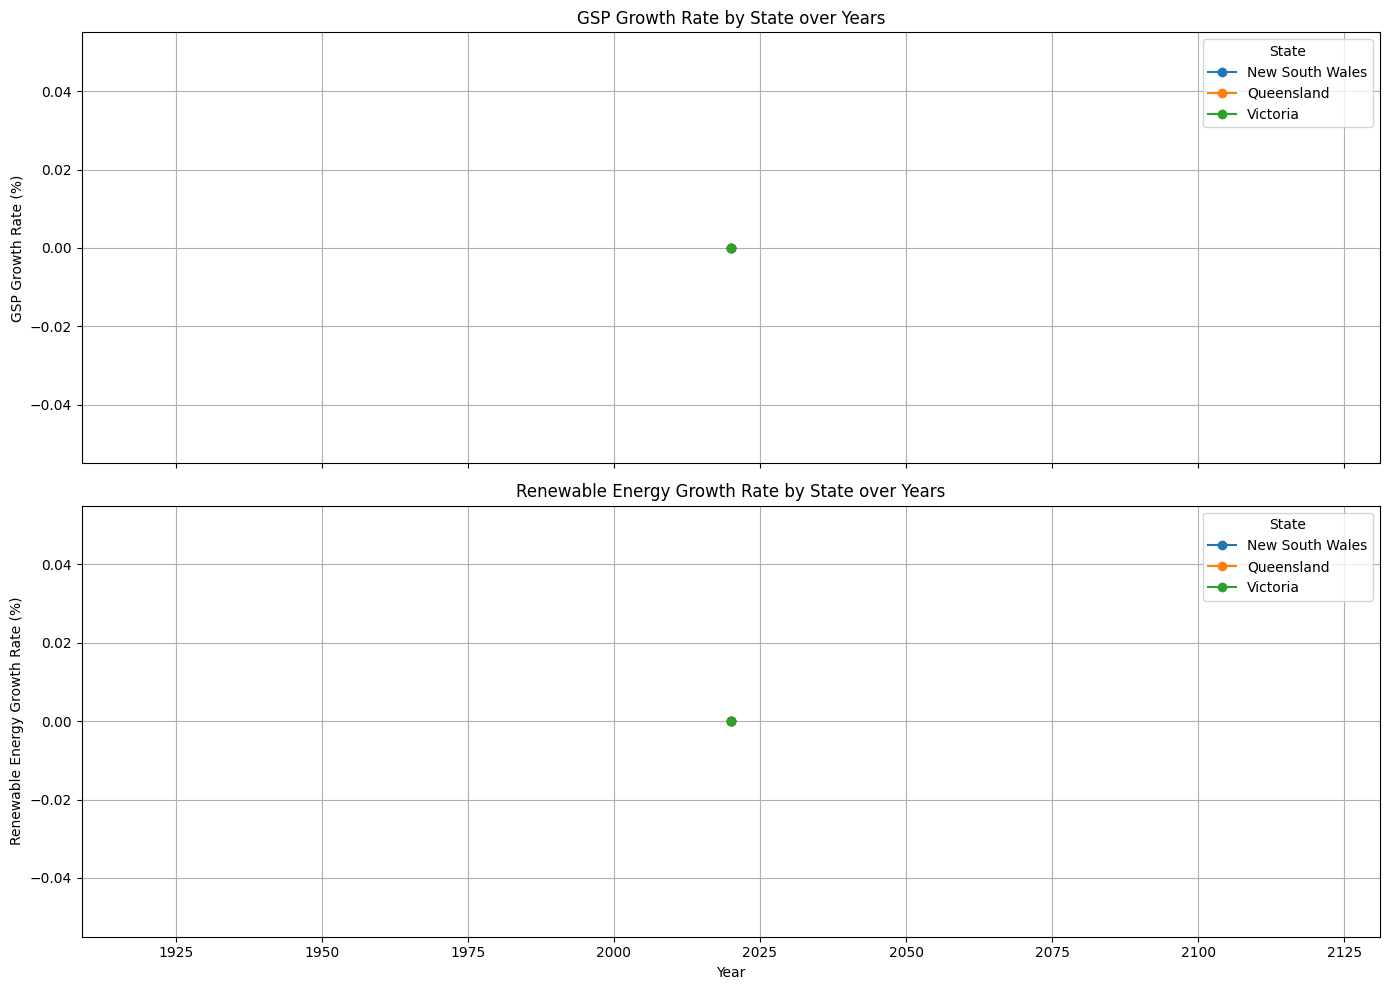

In [47]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite database
conn = sqlite3.connect('/mnt/data/AUS_energy_sqlite3.db')

# Query to get GSP growth rate data
query_gsp_growth = """
WITH GSP_Clean AS (
    SELECT Year, State, GSP
    FROM GSP_data
)
SELECT Year, State, GSP,
       ( GSP - LAG(GSP) OVER (PARTITION BY State ORDER BY Year) ) / LAG(GSP) OVER (PARTITION BY State ORDER BY Year) * 100 AS GSP_Growth_Rate
FROM GSP_Clean
"""

# Query to get renewable energy growth rate data
query_renewable_energy = """
WITH Renewable_Clean AS (
    SELECT Year, State, COALESCE("Renewables (PJ)", 0) AS "Renewables_Clean"
    FROM AUS_energy
)
SELECT Year, State, "Renewables_Clean",
       ( "Renewables_Clean" - LAG("Renewables_Clean") OVER (PARTITION BY State ORDER BY Year) ) / LAG("Renewables_Clean") OVER (PARTITION BY State ORDER BY Year) * 100 AS Renewable_Energy_Growth_Rate
FROM Renewable_Clean
"""

# Execute the queries and read the data
df_gsp_growth = pd.read_sql(query_gsp_growth, conn)
df_renewable_energy_growth = pd.read_sql(query_renewable_energy, conn)

# Close the connection
conn.close()

# Plot the data
fig, axs = plt.subplots(2, 1, figsize=(14, 10), sharex=True)

# Plot GSP growth rate
for state in df_gsp_growth['State'].unique():
    state_data = df_gsp_growth[df_gsp_growth['State'] == state]
    axs[0].plot(state_data['Year'], state_data['GSP_Growth_Rate'], marker='o', label=state)
axs[0].set_title('GSP Growth Rate by State over Years')
axs[0].set_ylabel('GSP Growth Rate (%)')
axs[0].legend(title='State')
axs[0].grid(True)

# Plot renewable energy growth rate
for state in df_renewable_energy_growth['State'].unique():
    state_data = df_renewable_energy_growth[df_renewable_energy_growth['State'] == state]
    axs[1].plot(state_data['Year'], state_data['Renewable_Energy_Growth_Rate'], marker='o', label=state)
axs[1].set_title('Renewable Energy Growth Rate by State over Years')
axs[1].set_xlabel('Year')
axs[1].set_ylabel('Renewable Energy Growth Rate (%)')
axs[1].legend(title='State')
axs[1].grid(True)

plt.tight_layout()
plt.show()

